In [85]:
import pandas as pd
import numpy as np

In [86]:
df_text = pd.read_csv("data/wsb_interim.csv", index_col=0)
df_vis = pd.read_csv("data/wsb_visuals.csv")

df_text.reset_index(inplace=True, drop=True)
df_vis.reset_index(inplace=True, drop=True)

In [87]:
df_vis.columns

Index(['id', 'col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7',
       'twitter', 'text_bow', 'text_length', 'text_capital', '0', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'screenshot'],
      dtype='object')

In [88]:
df_text.columns

Index(['title', 'score', 'id', 'url', 'comms_num', 'body', 'timestamp',
       'upvote_ratio', 'is_oc', 'permalink', 'name', 'is_self', 'date',
       'title_raw', 'body_raw', 'title_length', 'title_capital', 'body_length',
       'body_urls', 'body_punct', 'type', 'deleted', 'body_bow', 'title_bow'],
      dtype='object')

In [89]:
df_vis.head()

,id,col0,col1,col2,col3,col4,col5,col6,col7,twitter,...,4,5,6,7,8,9,10,11,12,screenshot
0,l0j2uy,0.500000,0.566667,0.533333,0.547619,0.541667,0.583333,0.541667,0.000000,0,...,-1.149603,-1.947309,-4.740125,-13.350494,10.041041,-0.277502,-1.350466,1.800887,8.404503,False
1,l0jw5j,0.566667,0.600000,0.643875,0.966667,0.680233,0.625786,0.051282,0.710145,0,...,-7.948915,0.232046,-8.669718,15.691691,4.067730,-0.449462,-1.699930,1.796376,-10.906918,False
2,l0k6vs,0.000000,0.000000,0.000000,0.000000,0.944444,0.986111,0.991546,0.991228,0,...,10.683289,8.197580,-0.654460,-5.188345,2.994244,2.001646,-2.542726,0.144770,-0.092432,False
3,l0k7wq,0.523810,0.511364,0.311111,0.384615,0.407407,0.148718,0.388889,0.996633,0,...,-21.758307,5.091673,-4.672430,19.499205,2.614788,9.483265,0.321465,-6.307117,-1.994259,False
4,l0khnn,0.500000,0.533333,0.533333,0.533333,0.533333,0.541667,0.562500,0.666667,0,...,5.856569,16.374063,6.678858,5.530633,4.426989,1.039345,-5.990426,0.222307,-5.609296,True


In [90]:
df_text.head()

,title,score,id,url,comms_num,body,timestamp,upvote_ratio,is_oc,permalink,...,body_raw,title_length,title_capital,body_length,body_urls,body_punct,type,deleted,body_bow,title_bow
0,"['manipulation', 'happen', 'different', 'platf...",4,l69fvk,https://www.reddit.com/r/wallstreetbets/commen...,2,"['trading', 'platform', 'disable', 'ability', ...",2021-01-27 18:18:38,0.75,False,/r/wallstreetbets/comments/l69fvk/due_to_all_t...,...,Many trading platforms have disabled the abili...,18,0.068966,29.0,0,1,text,False,"[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"['hold', 'GME', 'till', 'squeeze', 'squoze']",1157,l87ci6,https://i.redd.it/20f2x4ehsce61.png,85,NaN,2021-01-30 00:12:20,0.99,False,/r/wallstreetbets/comments/l87ci6/holding_gme_...,...,NaN,9,0.117647,NaN,0,0,image,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"['go', 'long', 'dick']",0,lc8dnh,https://www.reddit.com/r/wallstreetbets/commen...,7,"['month', 'ago', 'find', 'big', 'dick', 'thank...",2021-02-04 06:17:59,0.39,False,/r/wallstreetbets/comments/lc8dnh/going_long_o...,...,A month ago I found out that I have a big dick...,5,0.058824,155.0,0,1,text,False,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
3,"['TASTYWORKS', 'set', 'certain', 'stock', 'clo...",3,l71knz,https://www.reddit.com/r/wallstreetbets/commen...,0,"['Apex', 'Clearing', 'act', 'custodian', 'tast...",2021-01-28 17:35:13,1.00,False,/r/wallstreetbets/comments/l71knz/tastyworks_i...,...,"""Apex Clearing, who acts as the custodian of a...",11,0.941176,110.0,0,1,text,False,"[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
4,"['help', 'dumbas', 'FUCKING', 'question']",4,l70720,https://www.reddit.com/r/wallstreetbets/commen...,7,"['follow', 'couple', 'year', 'start', 'buy', '...",2021-01-28 16:45:57,0.70,False,/r/wallstreetbets/comments/l70720/please_help_...,...,I\u2019ve been following for a couple years......,8,1.000000,41.0,0,1,text,False,"[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [91]:
df_text = df_text.drop(['title', 'body', 'title_raw', 'body_raw', 'date', 'permalink', 'name'], axis=1)

In [92]:
df_text['body_length'] = df_text['body_length'].fillna(value=0)

In [93]:
df_text.head()

,score,id,url,comms_num,timestamp,upvote_ratio,is_oc,is_self,title_length,title_capital,body_length,body_urls,body_punct,type,deleted,body_bow,title_bow
0,4,l69fvk,https://www.reddit.com/r/wallstreetbets/commen...,2,2021-01-27 18:18:38,0.75,False,True,18,0.068966,29.0,0,1,text,False,"[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1157,l87ci6,https://i.redd.it/20f2x4ehsce61.png,85,2021-01-30 00:12:20,0.99,False,False,9,0.117647,0.0,0,0,image,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0,lc8dnh,https://www.reddit.com/r/wallstreetbets/commen...,7,2021-02-04 06:17:59,0.39,False,True,5,0.058824,155.0,0,1,text,False,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
3,3,l71knz,https://www.reddit.com/r/wallstreetbets/commen...,0,2021-01-28 17:35:13,1.00,False,True,11,0.941176,110.0,0,1,text,False,"[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
4,4,l70720,https://www.reddit.com/r/wallstreetbets/commen...,7,2021-01-28 16:45:57,0.70,False,True,8,1.000000,41.0,0,1,text,False,"[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [94]:
body_bow = df_text['body_bow']
title_bow = df_text['title_bow']
image_bow = df_vis['text_bow']

In [95]:
def str_to_list(x):
    x = x.strip('][').split(', ')
    return [int(c) for c in x]

In [96]:
body_bow = body_bow.apply(str_to_list)
title_bow = title_bow.apply(str_to_list)
image_bow = image_bow.apply(str_to_list)

In [97]:
print(len(body_bow[0]), len(title_bow[0]), len(image_bow[0]))

200 200 200


In [98]:
def reduce(x, n):
    return x[:n]

In [99]:
body_bow = body_bow.apply(reduce, args=(100,))
title_bow = title_bow.apply(reduce, args=(100,))
image_bow = image_bow.apply(reduce, args=(100,))

In [100]:
print(len(body_bow[0]), len(title_bow[0]), len(image_bow[0]))

100 100 100


In [101]:
body_bow = body_bow.apply(lambda x: np.asarray(x))
title_bow = title_bow.apply(lambda x: np.asarray(x))
image_bow = image_bow.apply(lambda x: np.asarray(x))

In [102]:
body_ind = ['b'+str(x) for x in range(100)]
title_ind = ['t'+str(x) for x in range(100)]
image_ind = ['i'+str(x) for x in range(100)]

df_body = pd.DataFrame(body_bow.values.tolist(), columns=body_ind)
df_title = pd.DataFrame(title_bow.values.tolist(), columns=title_ind)
df_image = pd.DataFrame(image_bow.values.tolist(), columns=image_ind)

In [103]:
df_vis = df_vis.join(df_image)
df_vis = df_vis.drop('text_bow', axis=1)

In [104]:
df_vis

,id,col0,col1,col2,col3,col4,col5,col6,col7,twitter,...,i90,i91,i92,i93,i94,i95,i96,i97,i98,i99
0,l0j2uy,0.500000,0.566667,0.533333,0.547619,0.541667,0.583333,0.541667,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
1,l0jw5j,0.566667,0.600000,0.643875,0.966667,0.680233,0.625786,0.051282,0.710145,0,...,0,0,0,0,0,0,0,0,0,0
2,l0k6vs,0.000000,0.000000,0.000000,0.000000,0.944444,0.986111,0.991546,0.991228,0,...,0,0,0,0,0,0,0,0,0,0
3,l0k7wq,0.523810,0.511364,0.311111,0.384615,0.407407,0.148718,0.388889,0.996633,0,...,0,0,0,0,0,0,0,0,0,0
4,l0khnn,0.500000,0.533333,0.533333,0.533333,0.533333,0.541667,0.562500,0.666667,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10625,lh8j7j,0.333333,0.466667,0.333333,0.583333,0.541667,0.333333,0.350000,0.339623,0,...,0,0,0,0,0,0,0,0,0,0
10626,lh9q18,0.500000,0.500000,0.366667,0.000000,0.000000,0.297158,0.305556,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
10627,lh9t7w,0.583333,0.500000,0.416667,0.444444,0.307018,0.000000,0.302326,0.305556,0,...,0,0,0,0,0,1,0,0,0,0
10628,lhaeyc,0.666667,0.611111,0.611111,0.583333,0.038690,0.583333,0.333333,0.033708,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
df_text = df_text.join(df_body)
df_text = df_text.join(df_title)
df_text = df_text.drop(['title_bow', 'body_bow'], axis=1)

In [106]:
df_text

,score,id,url,comms_num,timestamp,upvote_ratio,is_oc,is_self,title_length,title_capital,...,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99
0,4,l69fvk,https://www.reddit.com/r/wallstreetbets/commen...,2,2021-01-27 18:18:38,0.75,False,True,18,0.068966,...,0,0,0,0,0,0,0,0,0,0
1,1157,l87ci6,https://i.redd.it/20f2x4ehsce61.png,85,2021-01-30 00:12:20,0.99,False,False,9,0.117647,...,0,0,0,0,0,0,0,0,0,0
2,0,lc8dnh,https://www.reddit.com/r/wallstreetbets/commen...,7,2021-02-04 06:17:59,0.39,False,True,5,0.058824,...,0,0,0,0,0,0,0,0,0,0
3,3,l71knz,https://www.reddit.com/r/wallstreetbets/commen...,0,2021-01-28 17:35:13,1.00,False,True,11,0.941176,...,0,0,0,0,0,0,0,0,0,0
4,4,l70720,https://www.reddit.com/r/wallstreetbets/commen...,7,2021-01-28 16:45:57,0.70,False,True,8,1.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38903,0,l6b99w,https://www.reddit.com/r/wallstreetbets/commen...,15,2021-01-27 19:32:50,0.36,False,True,20,0.033333,...,0,0,0,0,0,0,0,0,0,0
38904,16,l6zb4b,https://i.redd.it/c4xkr2zwa3e61.jpg,2,2021-01-28 16:15:16,0.90,False,False,29,0.583333,...,0,0,0,0,0,0,0,0,0,0
38905,77,l70tgo,https://www.reddit.com/r/wallstreetbets/commen...,10,2021-01-28 17:09:14,1.00,False,True,16,0.104167,...,0,0,0,0,0,0,0,0,0,0
38906,0,lcgmi4,https://www.reddit.com/r/wallstreetbets/commen...,19,2021-02-04 15:20:37,0.32,False,True,4,0.333333,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df = df_text.set_index('id').join(df_vis.set_index('id'))

# Fill nans

In [108]:
bows = body_ind + title_ind + image_ind

In [109]:
df[bows] = df[bows].fillna(value=0)
zeros = ['text_length', 'text_capital', 'screenshot']
df['screenshot'] = df['screenshot'].replace({True: 1, False: 0})
df[zeros] = df[zeros].fillna(value=0)

features = [str(x) for x in range(13)]
df[features] = df[features].fillna(value=0)

In [110]:
df.columns[df.isnull().any()]

Index(['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7',
       'twitter'],
      dtype='object')

In [111]:
df[['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7']].describe()

,col0,col1,col2,col3,col4,col5,col6,col7
count,10630.000000,10630.000000,10629.000000,10629.000000,10622.000000,10610.000000,10529.000000,10102.000000
mean,0.408675,0.416903,0.406555,0.392058,0.374618,0.368731,0.356264,0.336010
std,0.245863,0.241653,0.251523,0.261536,0.273515,0.282466,0.287330,0.294645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.231231,0.151515,0.104167,0.060657,0.047138,0.041667,0.019773
50%,0.500000,0.500000,0.500000,0.481481,0.444444,0.416667,0.350000,0.316935
75%,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333
max,0.995338,0.998904,0.998958,0.998911,0.998801,0.999225,0.999179,0.999118


In [112]:
colors = ['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7']
df[colors] = df[colors].fillna(value=0.0)

In [113]:
def fill_twitt(x):
    if x['twitter'] == 0 or x['twitter'] == 1:
        return x['twitter']
    if 'twitter' in x['url']:
        return 1.0
    return 0.0

In [114]:
df['twitter'] = df.apply(fill_twitt, axis=1)

In [115]:
df = df.join(pd.get_dummies(df['type']))
df.drop('type', axis=1, inplace=True)

#### Save csv

In [116]:
df.to_csv('data/wsb_merged.csv')

In [117]:
df.drop('url', axis=1, inplace=True)

In [118]:
import datetime

def get_hour(x):
    return int(x[11:13])
    
def get_day(x):
    date = datetime.datetime(int(x[:4]), int(x[5:7]), int(x[8:10]))
    return date.weekday()

In [119]:
df['weekday'] = df['timestamp'].apply(get_day)
df['hour'] = df['timestamp'].apply(get_hour)

df.drop('timestamp', axis=1, inplace=True)

In [120]:
df

,score,comms_num,upvote_ratio,is_oc,is_self,title_length,title_capital,body_length,body_urls,body_punct,...,i96,i97,i98,i99,image,other,text,video,weekday,hour
id,,,,,,,,,,,,,,,,,,,,,
l69fvk,4,2,0.75,False,True,18,0.068966,29.0,0,1,...,0.0,0.0,0.0,0.0,0,0,1,0,2,18
l87ci6,1157,85,0.99,False,False,9,0.117647,0.0,0,0,...,0.0,0.0,0.0,0.0,1,0,0,0,5,0
lc8dnh,0,7,0.39,False,True,5,0.058824,155.0,0,1,...,0.0,0.0,0.0,0.0,0,0,1,0,3,6
l71knz,3,0,1.00,False,True,11,0.941176,110.0,0,1,...,0.0,0.0,0.0,0.0,0,0,1,0,3,17
l70720,4,7,0.70,False,True,8,1.000000,41.0,0,1,...,0.0,0.0,0.0,0.0,0,0,1,0,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l6b99w,0,15,0.36,False,True,20,0.033333,37.0,0,1,...,0.0,0.0,0.0,0.0,0,0,1,0,2,19
l6zb4b,16,2,0.90,False,False,29,0.583333,0.0,0,0,...,0.0,0.0,0.0,0.0,1,0,0,0,3,16
l70tgo,77,10,1.00,False,True,16,0.104167,18.0,0,1,...,0.0,0.0,0.0,0.0,0,0,1,0,3,17


In [121]:
wcols = dict(zip([x for x in range(7)], ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']))
hcols = dict(zip([x for x in range(24)], [f'{x}:00' for x in range(24)]))

df = df.join(pd.get_dummies(df['weekday']).rename(wcols, axis=1))
df = df.join(pd.get_dummies(df['hour']).rename(hcols, axis=1))
df.drop(['weekday', 'hour'], axis=1, inplace=True)

# Korelacja

In [122]:
non_bow = [x for x in df.columns if x not in bows]

In [123]:
non_bow

['score',
 'comms_num',
 'upvote_ratio',
 'is_oc',
 'is_self',
 'title_length',
 'title_capital',
 'body_length',
 'body_urls',
 'body_punct',
 'deleted',
 'col0',
 'col1',
 'col2',
 'col3',
 'col4',
 'col5',
 'col6',
 'col7',
 'twitter',
 'text_length',
 'text_capital',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 'screenshot',
 'image',
 'other',
 'text',
 'video',
 'monday',
 'tuesday',
 'wednesday',
 'thursday',
 'friday',
 'saturday',
 'sunday',
 '0:00',
 '1:00',
 '2:00',
 '3:00',
 '4:00',
 '5:00',
 '6:00',
 '7:00',
 '8:00',
 '9:00',
 '10:00',
 '11:00',
 '12:00',
 '13:00',
 '14:00',
 '15:00',
 '16:00',
 '17:00',
 '18:00',
 '19:00',
 '20:00',
 '21:00',
 '22:00',
 '23:00']

In [124]:
df[non_bow]

,score,comms_num,upvote_ratio,is_oc,is_self,title_length,title_capital,body_length,body_urls,body_punct,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
id,,,,,,,,,,,,,,,,,,,,,
l69fvk,4,2,0.75,False,True,18,0.068966,29.0,0,1,...,0,0,0,0,1,0,0,0,0,0
l87ci6,1157,85,0.99,False,False,9,0.117647,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
lc8dnh,0,7,0.39,False,True,5,0.058824,155.0,0,1,...,0,0,0,0,0,0,0,0,0,0
l71knz,3,0,1.00,False,True,11,0.941176,110.0,0,1,...,0,0,0,1,0,0,0,0,0,0
l70720,4,7,0.70,False,True,8,1.000000,41.0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l6b99w,0,15,0.36,False,True,20,0.033333,37.0,0,1,...,0,0,0,0,0,1,0,0,0,0
l6zb4b,16,2,0.90,False,False,29,0.583333,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
l70tgo,77,10,1.00,False,True,16,0.104167,18.0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [125]:
cont = ['score', 'comms_num', 'upvote_ratio', 'title_length', 'title_capital', 'body_length', 'text_length', 'text_capital']
features = [str(x) for x in range(13)]
cont += features
cont += colors

## Pearson

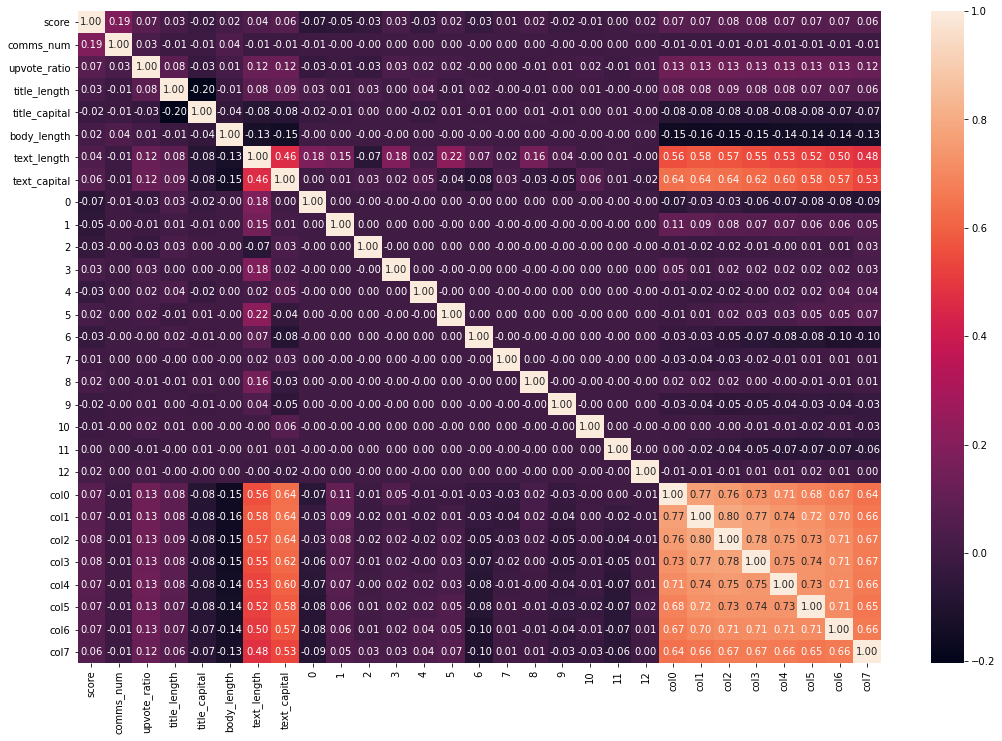

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[cont].corr()

plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [127]:
selected_pearson_score = np.array(cont)[np.abs(corr.values)[0, :] >= 0.03]
selected_pearson_comms = np.array(cont)[np.abs(corr.values)[1, :] >= 0.03]

## Spearman

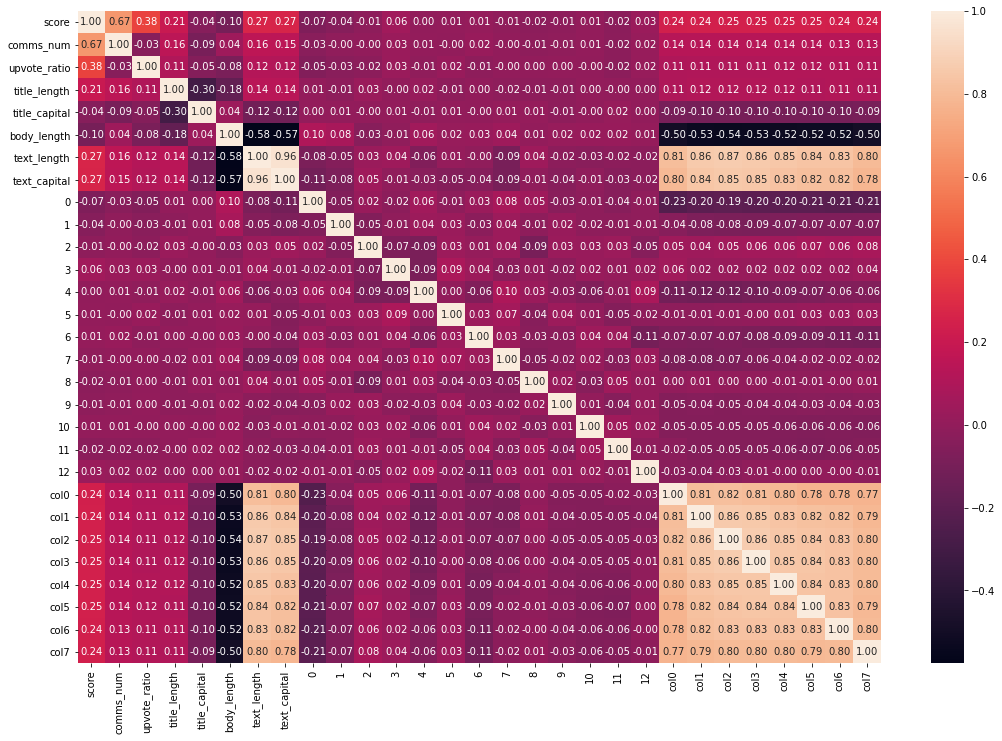

In [128]:
corr = df[cont].corr(method='spearman')

plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [129]:
selected_spearman_score = np.array(cont)[np.abs(corr.values)[0, :] >= 0.03]
selected_spearman_comms = np.array(cont)[np.abs(corr.values)[1, :] >= 0.03]

# Feature selection

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso, LinearRegression

In [131]:
targets = ['score', 'comms_num', 'upvote_ratio']
cont_features = [el for el in cont if el not in targets]

In [132]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[cont_features].values)

scaled_df = df.copy()
scaled_df[cont_features] = scaled_data

In [133]:
target_df = scaled_df[targets]
scaled_df.drop(targets, axis=1, inplace=True)

In [134]:
selector_0 = VarianceThreshold(threshold=0.03)
selector_1 = VarianceThreshold(threshold=0.05)
selector_2 = VarianceThreshold(threshold=0.1)
selector_3 = VarianceThreshold(threshold=0.15)

selectors = [selector_0, selector_1, selector_2, selector_3]

In [135]:
df_cols = list(scaled_df.columns)

selected_var = []

for x, selector in enumerate(selectors):
    selector.fit(scaled_df.values)
    mapping = selector.get_support()
    selected = [feature for idx, feature in enumerate(df_cols) if mapping[idx]==True]
    selected_var.append(selected)
    
    print(f'Selector {x}: Selected {len(selected)} features\n {selected}\n')

Selector 0: Selected 143 features
 ['is_self', 'title_length', 'title_capital', 'body_length', 'body_urls', 'body_punct', 'deleted', 'b0', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b22', 'b23', 'b24', 'b25', 'b26', 'b27', 'b28', 'b29', 'b30', 'b31', 'b32', 'b33', 'b34', 'b35', 'b36', 'b37', 'b38', 'b39', 'b40', 'b41', 'b42', 'b43', 'b44', 'b45', 'b46', 'b47', 'b48', 'b49', 'b50', 'b51', 'b52', 'b53', 'b54', 'b55', 'b57', 'b60', 'b61', 'b63', 'b64', 'b66', 'b68', 'b70', 'b83', 'b88', 't0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 'col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'text_length', 'text_capital', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'screenshot', 'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i15', 'i16', 'image', 'other', 'text', 'monday', 'tuesday', '

### Lasso selection

In [136]:
rest_features = [f for f in df_cols if f not in cont_features]

numeric_transformer = Pipeline([('scaler', StandardScaler())])
cat_transformer = Pipeline([('imputer', SimpleImputer())])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, cont_features),
    ('cat', cat_transformer, rest_features)
])

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', Lasso())])

In [137]:
selected_lasso = []

for target in targets:
    search = GridSearchCV(pipeline, {'model__alpha':np.arange(1,10,1)},
                    cv = 5, scoring="neg_mean_squared_error")
    
    X_train, X_test, y_train, y_test = train_test_split(df[df_cols], df[target], test_size=0.33, random_state=42)
    
    search.fit(X_train, y_train)
    print(f'{target}: {search.best_params_}\n')
    
    coefficients = search.best_estimator_.named_steps['model'].coef_
    importance = np.abs(coefficients)
    
    selected = np.array(df_cols)[importance > 0]
    discarded = np.array(df_cols)[importance == 0]
    
    selected_lasso.append(selected)
    
    print(f'Selected {selected.shape[0]} features\n {selected}\n Discarded: {discarded}\n')

score: {'model__alpha': 9}

Selected 102 features
 ['is_oc' 'body_length' 'body_urls' 'body_punct' 'deleted' 'b0' 'b1' 'b2'
 'b3' 'b4' 'b5' 'b6' 'b7' 'b8' 'b9' 'b11' 'b12' 'b14' 'b17' 'b18' 'b21'
 'b25' 'b28' 'b29' 'b33' 'b36' 'b38' 'b40' 'b42' 'b43' 'b48' 'b51' 'b54'
 'b58' 'b62' 'b64' 'b78' 'b80' 'b83' 'b85' 't0' 't5' 't7' 't12' 't23'
 't24' 't28' 't30' 't36' 't43' 't44' 't47' 't49' '12' 'screenshot' 'i0'
 'i4' 'i6' 'i8' 'i13' 'i14' 'i16' 'i24' 'i26' 'i28' 'i31' 'i34' 'i35'
 'i37' 'i42' 'i45' 'i55' 'i57' 'i63' 'i70' 'i77' 'i84' 'i90' 'i96' 'i98'
 'image' 'other' 'text' 'video' 'tuesday' 'wednesday' 'thursday' 'friday'
 'saturday' 'sunday' '1:00' '3:00' '4:00' '9:00' '13:00' '15:00' '16:00'
 '17:00' '18:00' '19:00' '20:00' '21:00']
 Discarded: ['is_self' 'title_length' 'title_capital' 'b10' 'b13' 'b15' 'b16' 'b19'
 'b20' 'b22' 'b23' 'b24' 'b26' 'b27' 'b30' 'b31' 'b32' 'b34' 'b35' 'b37'
 'b39' 'b41' 'b44' 'b45' 'b46' 'b47' 'b49' 'b50' 'b52' 'b53' 'b55' 'b56'
 'b57' 'b59' 'b60' 'b61' 'b

# Choose best

In [143]:
best_var = selected_var[0]
best_lasso = selected_lasso[1]

best_p = list(selected_pearson_score)
best_p.extend(x for x in selected_pearson_comms if x not in best_p)

best_s = list(selected_spearman_score)
best_s.extend(x for x in selected_spearman_comms if x not in best_p)

In [149]:
best_comb = [feature for feature in best_var if feature in best_lasso]
best_corr = [feature for feature in best_p if feature in best_s]
best_features = best_comb
best_features.extend(x for x in best_corr if x not in best_comb)

In [150]:
len(best_features)

109

In [152]:
df_best = df[best_features]

In [159]:
df_best.to_csv("data/wsb_processed.csv")